# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. El/La alumnx deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el/la alumnx utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**. 
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

## Integrantes del equipo

*   Ramiro Andres Peñaranda G.
*   Jorge A. González P.



## Carga de datos desde la plataforma Kaggle

In [ ]:
# En primer lugar se debe generar un API de Kaggle personal, para ello:
#  1. Registrarse en  https://www.kaggle.com
#  2. Ir a 'Account tab' de tu perfil y seleccionar 'Create API Token'
#  3. Almacenar en tu ordenador local el fichero kaggle.json

In [ ]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
#%%capture
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json)
from google.colab import files
files.upload()

In [4]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Conectamos con nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [6]:
# Establezco una ruta absoluta a un directorio existente de mi Google Drive
BASE_FOLDER = "/content/drive/MyDrive/07MIAR_Proyecto_Programacion/"

In [7]:
# IMPORTANTE ANTES DE DESCARGAR UN DATASET !!!
# Antes de descargar el dataset debemos ir a https://www.kaggle.com/c/$nameCompetition/data y aceptar las "Competition Rules"
# En caso de no realizar el paso anterior al descargar el dataset obtenedremos el siguiente mensaje "403 - Forbidden"
# AHORA SI: Descarguemos un dataset de cierta competición
!kaggle competitions download -c plant-seedlings-classification

100% 1.68G/1.69G [00:49<00:00, 87.9MB/s]
100% 1.69G/1.69G [00:49<00:00, 36.8MB/s]


In [8]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

In [9]:
# Descomprimimos los datos y los dejamos listos para trabajar
!unzip -o -q plant-seedlings-classification.zip -d my_dataset

In [10]:
# Contenido de la carpeta train con el dataset descomprimido
!ls my_dataset/train

 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


In [13]:
# Generamos un array con las etiquetas del dataset
label_names = ["Black-grass"
              ,"Charlock"
              ,"Cleavers"
              ,"Common Chickweed"
              ,"Common wheat"
              ,"Fat Hen"
              ,"Loose Silky-bent"
              ,"Maize"
              ,"Scentless Mayweed"
              ,"Shepherds Purse"
              ,"Small-flowered Cranesbill"
              ,"Sugar beet"]

train_images_path = 'my_dataset/train'

## Inspeccionando los datos

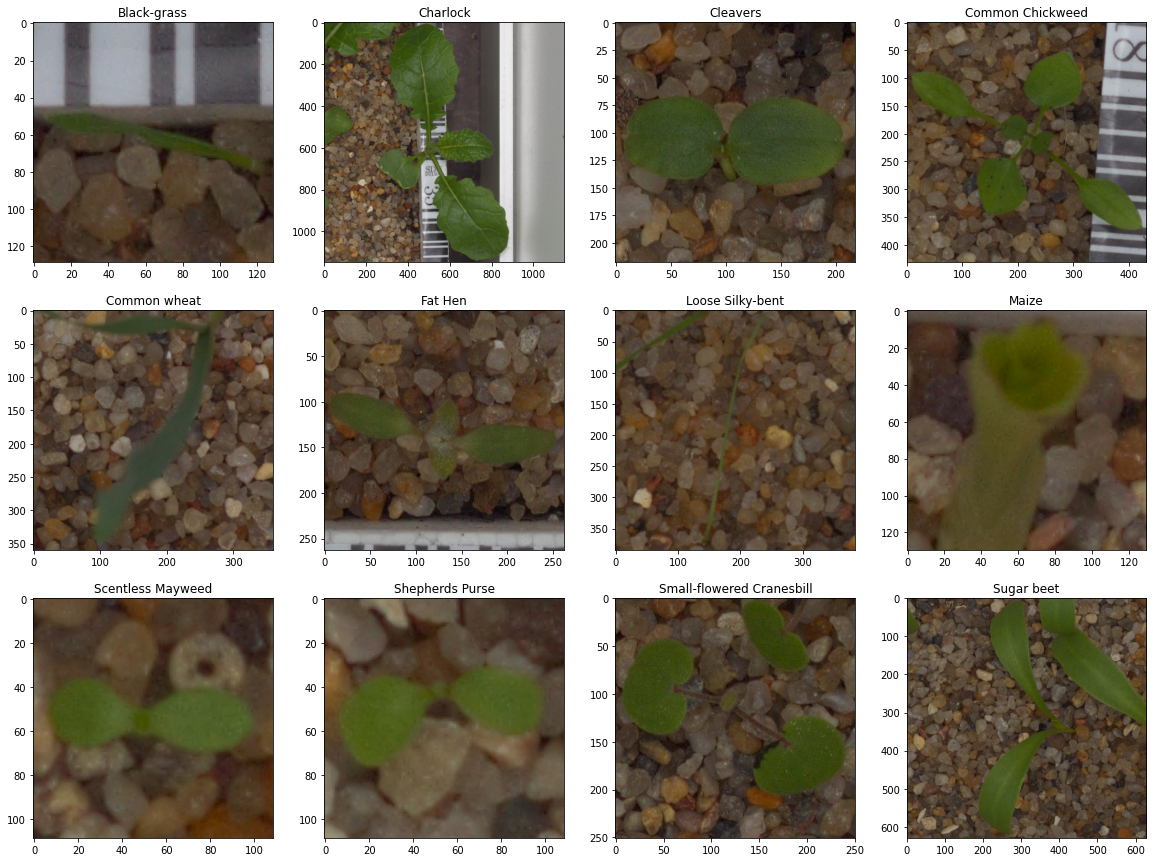

4750
[49 49]


In [14]:
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2

np.random.seed(42)
tf.random.set_seed(42)

fig = plt.figure(figsize=(20,15))

# Contamos las imagenes y mostramos la primera en cada carpeta/etiqueta
# Buscamos las dimensiones de las imagenes para establecer la dimensión minima

n_images = 0
image_index = 1
image_shapes = []
for label_folder in label_names:
  first_image = True
  for image in listdir(f'{train_images_path}/{label_folder}'):
    img = cv2.imread(f'{train_images_path}/{label_folder}/{image}')
    image_shapes.append([img.shape[0], img.shape[1]])

    if first_image:
      fig.add_subplot(3, 4, image_index)
      
      plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      plt.title(label_folder)
      first_image = False
      image_index += 1

    n_images += 1

plt.show()

print(n_images)
min_images_shape = np.min(image_shapes, axis=0)
print(min_images_shape)

Luego de inspeccionar el conjunto de datos, encontramos que tenemos diferentes resoluciones en las imagenes.

En total en el conjunto de datos tenemos 4750 imagenes y la resolución de imagen mas pequeña encontrada es de 49x49

## Acondicionamiento del conjunto de datos

Teniendo en cuenta que el dataset original tiene una carpeta con imagenes de test que no estan etiquetadas, procedemos a utilizar la carpeta train para generar un conjunto de test etiquetado haciendo uso de la librería ImageDataGenerator.

Adicionalmente se aplica el redimensionamiento de las imagenes.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def generate_training_test_data(train_images_path
                                , target_size
                                , label_names
                                , batch_size
                                , validation_split
                                , norm_images=True):
  train_test_datagen = ImageDataGenerator(validation_split=validation_split)

  # Generando datos para training
  train_iterator = train_test_datagen.flow_from_directory(
      train_images_path
      , target_size=target_size
      , interpolation='bilinear'
      , class_mode='sparse'
      , batch_size= batch_size
      , subset='training'
      , classes=label_names
      , seed=42
      , shuffle=True)

  train_x, train_y = train_iterator.next()
  print(train_x.shape)
  print(train_y.shape)

  # Generando datos para test
  test_iterator = train_test_datagen.flow_from_directory(
      train_images_path
      , target_size=target_size
      , interpolation='bilinear'
      , class_mode='sparse'
      , batch_size=batch_size
      , subset='validation'
      , classes=label_names
      , seed=42
      , shuffle=True)

  test_x, test_y = test_iterator.next()
  print(test_x.shape)
  print(test_y.shape)

  normalize_image = lambda x: x/255.0 if norm_images else x

  return (normalize_image(train_x)
    , train_y
    , normalize_image(test_x)
    , test_y)
  
def show_sample_image(image):
  plt.imshow((image*255.0).astype(np.uint8))#8
  plt.show()

def show_classes_distribution(train_y, test_y, label_names):
  # Validar cuantos ejemplos por clase tenemos en cada set de datos
  classes, class_count_train = np.unique(train_y, return_counts=True)
  print("**Train")
  for c, n in zip(classes, class_count_train):
    print(f"{label_names[int(c)]}: {n}")

  classes, class_count_test = np.unique(test_y, return_counts=True)
  print("\n**Test")
  for c, n in zip(classes, class_count_test):
    print(f"{label_names[int(c)]}: {n}")

Cargamos las imagenes aplicando normalización (dividiendo por 255)

In [40]:
train_x, train_y, test_x, test_y = generate_training_test_data(train_images_path
                                        , (192,192)
                                        , label_names
                                        , n_images
                                        , validation_split=0.2
                                        , norm_images=True)

# Shape de la entrada de la red
network_input_shape = (train_x.shape[1], train_x.shape[2], train_x.shape[3])

Found 3803 images belonging to 12 classes.
(3803, 192, 192, 3)
(3803,)
Found 947 images belonging to 12 classes.
(947, 192, 192, 3)
(947,)


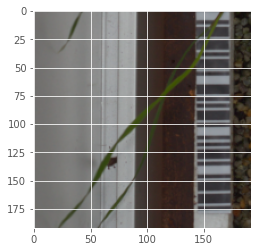

In [47]:
show_sample_image(train_x[train_y==0][6])

In [ ]:
show_classes_distribution(train_y, test_y, label_names)

**Train
Black-grass: 211
Charlock: 312
Cleavers: 230
Common Chickweed: 489
Common wheat: 177
Fat Hen: 380
Loose Silky-bent: 524
Maize: 177
Scentless Mayweed: 413
Shepherds Purse: 185
Small-flowered Cranesbill: 397
Sugar beet: 308

**Test
Black-grass: 52
Charlock: 78
Cleavers: 57
Common Chickweed: 122
Common wheat: 44
Fat Hen: 95
Loose Silky-bent: 130
Maize: 44
Scentless Mayweed: 103
Shepherds Purse: 46
Small-flowered Cranesbill: 99
Sugar beet: 77


Se puede observar que existe un desbalance entre la cantidad de imagenes que tenemos disponibles para cada clase, lo que nos puede generar problemas en el entrenamiento mas adelante.

## Estrategia 1 - Topología de la red neuronal convolucional

In [17]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

### **Funciones de ayuda**

In [18]:
def show_classification_report(test_y, predictions, label_names):
  print(classification_report(test_y, predictions.argmax(axis=1), target_names=label_names))

def plot_training_performance(H, n_epochs):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, n_epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, n_epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, n_epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, n_epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.ylim(top=5)
  plt.legend()
  plt.show()

# Función para generar el modelo de la red convolucional de manera dinámica
def build_model(input_shape
                , filters
                , kernels
                , strides
                , top_model_units
                , padding='same'
                , use_maxpooling=False
                , use_batch_normalization=False
                , use_dropout=False
                , show_summary=False):
  model = Sequential()

  model.add(layers.Input(shape=input_shape, name='input_layer'))

  #Bloques convolucionales
  for i in range(len(filters)):
    for j in range(len(filters[i])):
        model.add(layers.Conv2D(filters=filters[i][j]
                                , kernel_size=kernels[i][j]
                                , strides=strides[i][j]
                                , padding=padding
                                , activation='relu'
                                , name=f'conv_layer_{i+1}_{j+1}'))
        
        if use_batch_normalization:
          model.add(layers.BatchNormalization(name=f'conv_batchnorm_{i+1}_{j+1}'))
    
    if use_maxpooling:
      model.add(layers.MaxPooling2D(pool_size=(2,2), name=f'conv_maxpool_{i+1}'))

    if use_dropout:
      model.add(layers.Dropout(0.25, name=f'conv_dropout_{i+1}'))

  #Top model
  model.add(layers.Flatten(name='top_flatten'))

  for i in range(len(top_model_units)):
    model.add(layers.Dense(top_model_units[i], activation='relu', name=f'top_dense_{i+1}'))
    if use_batch_normalization:
          model.add(layers.BatchNormalization(name=f'top_batchnorm_{i+1}'))

  if use_dropout:
      model.add(layers.Dropout(0.25, name='top_dropout'))

  model.add(layers.Dense(12, activation='softmax', name=f'top_dense_clasif'))

  if show_summary:
    print("[INFO]: Información del modelo...")
    model.summary()

  model.compile(optimizer=Adam(learning_rate=0.001)
              , loss='sparse_categorical_crossentropy'
              , metrics=['accuracy'])

  return model;
  
def show_model_evalution(model, H, n_epochs, training_batch_size, test_x, test_y, label_names):
  print("\n[INFO]: Evaluando el modelo...")

  # Gráfica training
  plot_training_performance(H, n_epochs)

  # Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
  predictions = model.predict(test_x, batch_size=training_batch_size)

  # Sacamos el report para test
  show_classification_report(test_y, predictions, label_names)

### Experimento #1
Procedemos a generar una arquitectura inicial para la red neuronal con una sola capa convolucional, filtros 3x3 y aplicando MaxPooling a la salida de la capa.

[INFO]: Entrenando la red...
Epoch 1/30
24/24 [==============================] - 3s 92ms/step - loss: 17.0545 - accuracy: 0.0894 - val_loss: 3.0445 - val_accuracy: 0.1432
Epoch 2/30
24/24 [==============================] - 2s 75ms/step - loss: 2.4963 - accuracy: 0.1519 - val_loss: 2.3805 - val_accuracy: 0.1669
Epoch 3/30
24/24 [==============================] - 2s 74ms/step - loss: 2.3511 - accuracy: 0.1759 - val_loss: 2.3072 - val_accuracy: 0.2339
Epoch 4/30
24/24 [==============================] - 2s 80ms/step - loss: 2.1867 - accuracy: 0.2978 - val_loss: 2.0790 - val_accuracy: 0.3219
Epoch 5/30
24/24 [==============================] - 2s 77ms/step - loss: 1.8702 - accuracy: 0.4060 - val_loss: 1.7914 - val_accuracy: 0.3850
Epoch 6/30
24/24 [==============================] - 2s 77ms/step - loss: 1.5346 - accuracy: 0.5141 - val_loss: 1.5895 - val_accuracy: 0.4297
Epoch 7/30
24/24 [==============================] - 2s 77ms/step - loss: 1.3420 - accuracy: 0.5750 - val_loss: 1.4223 - val_

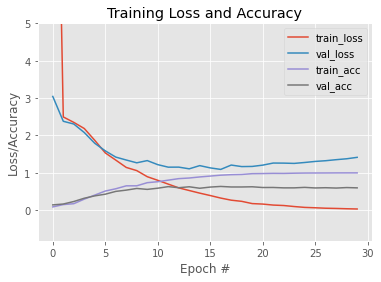

                           precision    recall  f1-score   support

              Black-grass       0.34      0.37      0.35        52
                 Charlock       0.78      0.82      0.80        78
                 Cleavers       0.72      0.51      0.60        57
         Common Chickweed       0.83      0.79      0.81       122
             Common wheat       0.35      0.16      0.22        44
                  Fat Hen       0.52      0.44      0.48        95
         Loose Silky-bent       0.59      0.81      0.68       130
                    Maize       0.72      0.66      0.69        44
        Scentless Mayweed       0.55      0.77      0.64       103
          Shepherds Purse       0.52      0.24      0.33        46
Small-flowered Cranesbill       0.80      0.80      0.80        99
               Sugar beet       0.59      0.56      0.57        77

                 accuracy                           0.64       947
                macro avg       0.61      0.58      0.58    

In [ ]:
model = build_model(input_shape = network_input_shape
                    , filters = [[32]]
                    , kernels = [[3]]
                    , strides = [[1]]
                    , top_model_units=[256]
                    , use_maxpooling=True)

print("[INFO]: Entrenando la red...")
n_epochs = 30
training_batch_size = 128
H = model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs)

# Evaluación del modelo
show_model_evalution(model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

Podemos observar que existe overfiting y un bajo rendimiento de la red con los datos de validación.

### Experimento #2

Procedemos a generar una arquitectura con dos capas convolucionales, filtros 3x3 y aplicando MaxPooling a la salida de las capas.

In [ ]:
model = build_model(input_shape = network_input_shape
                    , filters = [[32],[64]]
                    , kernels = [[3],[3]]
                    , strides = [[1],[1]]
                    , top_model_units=[256]
                    , use_maxpooling=True)

print("[INFO]: Entrenando la red...")
n_epochs = 30
training_batch_size = 128
H = model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs)

# Evaluación del modelo
show_model_evalution(model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

Persiste el overfitting, aunque se mejora levemente el entrenamiento (0.66 de precisión general) con los datos de validación.

### Experimento #3
Adicionamos una tercera capa convolucional al modelo para verificar si mejora

In [ ]:
model = build_model(input_shape = network_input_shape
                    , filters = [[32],[64],[128]]
                    , kernels = [[3],[3],[3]]
                    , strides = [[1],[1],[1]]
                    , top_model_units=[256]
                    , use_maxpooling=True)

print("[INFO]: Entrenando la red...")
n_epochs = 30
training_batch_size = 128
H = model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs)

# Evaluación del modelo
show_model_evalution(model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

El entrenamiento sigue mejorando levemente (0.68 de precisión general) aunque con overfitting.

### Experimento #4

En el siguiente experimento duplicamos en número de filtros en cada capa

In [ ]:
model = build_model(input_shape = network_input_shape
                    , filters = [[64],[128],[256]]
                    , kernels = [[3],[3],[3]]
                    , strides = [[1],[1],[1]]
                    , top_model_units=[256]
                    , use_maxpooling=True)

print("[INFO]: Entrenando la red...")
n_epochs = 30
training_batch_size = 128
H = model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs)

# Evaluación del modelo
show_model_evalution(model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

Nuevamente observamos una leve mejora en el entrenamiento (0.73 de precisión general).

### Experimento #5
Ahora, para tratar de reducir el overfitting aplicamos batch normalization a la salida de cada capa.

[INFO]: Entrenando la red...
Epoch 1/40
24/24 [==============================] - 7s 236ms/step - loss: 1.6279 - accuracy: 0.5339 - val_loss: 31.6246 - val_accuracy: 0.1156
Epoch 2/40
24/24 [==============================] - 5s 221ms/step - loss: 0.5086 - accuracy: 0.8445 - val_loss: 69.0341 - val_accuracy: 0.1156
Epoch 3/40
24/24 [==============================] - 5s 222ms/step - loss: 0.2594 - accuracy: 0.9329 - val_loss: 63.8280 - val_accuracy: 0.1156
Epoch 4/40
24/24 [==============================] - 5s 223ms/step - loss: 0.1223 - accuracy: 0.9776 - val_loss: 54.8836 - val_accuracy: 0.1156
Epoch 5/40
24/24 [==============================] - 5s 221ms/step - loss: 0.0516 - accuracy: 0.9954 - val_loss: 19.1734 - val_accuracy: 0.1156
Epoch 6/40
24/24 [==============================] - 5s 221ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 9.9424 - val_accuracy: 0.1156
Epoch 7/40
24/24 [==============================] - 5s 219ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 10

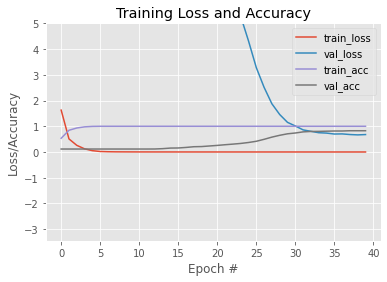

                           precision    recall  f1-score   support

              Black-grass       0.52      0.23      0.32        52
                 Charlock       0.95      0.91      0.93        78
                 Cleavers       0.96      0.86      0.91        57
         Common Chickweed       0.91      0.94      0.93       122
             Common wheat       0.83      0.68      0.75        44
                  Fat Hen       0.94      0.83      0.88        95
         Loose Silky-bent       0.68      0.95      0.79       130
                    Maize       0.93      0.84      0.88        44
        Scentless Mayweed       0.73      0.95      0.83       103
          Shepherds Purse       0.84      0.35      0.49        46
Small-flowered Cranesbill       0.88      0.93      0.90        99
               Sugar beet       0.89      0.86      0.87        77

                 accuracy                           0.83       947
                macro avg       0.84      0.78      0.79    

In [ ]:
model = build_model(input_shape = network_input_shape
                    , filters = [[64],[128],[256]]
                    , kernels = [[3],[3],[3]]
                    , strides = [[1],[1],[1]]
                    , top_model_units=[256]
                    , use_maxpooling=True
                    , use_batch_normalization=True
                    , use_dropout=False)

print("[INFO]: Entrenando la red...")
n_epochs = 40
training_batch_size = 128
H = model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs)

# Evaluación del modelo
show_model_evalution(model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

Aplicando batch normalization podemos observar una reducción del overfitting y una mejora general en la predicción con los datos de test. Tambien se realizaron pruebas aplicando dropout a la salida de cada bloque pero no se obtuvo una mejora tan evidente como la lograda con el batch normalization.

Cabe anotar que tuvimos que aumentar las epocas para lograr una mejor precisión con los datos de validación

### Experimento #6

Probando una arquitectura con dos capas convolucionales por bloque y una capa densa adicional de 128 al top model.

In [ ]:
model = build_model(input_shape = network_input_shape
                    , filters = [[64,64],[128,128],[256,256]]
                    , kernels = [[3,3],[3,3],[3,3]]
                    , strides = [[1,1],[1,1],[1,1]]
                    , top_model_units=[256, 128]
                    , use_maxpooling=True
                    , use_batch_normalization=True
                    , use_dropout=False
                    , show_summary=False)

print("[INFO]: Entrenando la red...")
n_epochs = 40
training_batch_size = 128
H = model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs)

# Evaluación del modelo
show_model_evalution(model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

Se puede observar una mejora tanto en el entrenamiento como en la predicción (0.89 de precisión general). Pero en el reporte de clasificación podemos encontrar algunas clases que presentan una precisión baja con respecto a las demas: Black-grass (0.65) y Loose Silky-bent (0.77), las cuales según las imagenes inspeccionadas representan un tipo de planta muy delgada.

### Experimento #7
Procedemos a ajustar la arquitectura adicionando un bloque convolucional con 512 filtros por capa y cambiando el tamaño de los kernels en los primeros bloques para validar si se mejora la percepción en las clases con baja precisión

[INFO]: Información del modelo...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1_1 (Conv2D)     (None, 192, 192, 64)      256       
                                                                 
 conv_batchnorm_1_1 (BatchNo  (None, 192, 192, 64)     256       
 rmalization)                                                    
                                                                 
 conv_layer_1_2 (Conv2D)     (None, 192, 192, 64)      4160      
                                                                 
 conv_batchnorm_1_2 (BatchNo  (None, 192, 192, 64)     256       
 rmalization)                                                    
                                                                 
 conv_maxpool_1 (MaxPooling2  (None, 96, 96, 64)       0         
 D)                                                              
                    

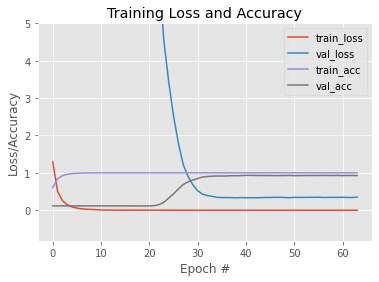

                           precision    recall  f1-score   support

              Black-grass       0.70      0.60      0.65        52
                 Charlock       0.95      0.95      0.95        78
                 Cleavers       0.95      0.93      0.94        57
         Common Chickweed       0.97      0.95      0.96       122
             Common wheat       0.91      0.93      0.92        44
                  Fat Hen       0.96      0.97      0.96        95
         Loose Silky-bent       0.86      0.91      0.88       130
                    Maize       1.00      0.95      0.98        44
        Scentless Mayweed       0.88      0.97      0.93       103
          Shepherds Purse       0.87      0.72      0.79        46
Small-flowered Cranesbill       0.94      0.95      0.94        99
               Sugar beet       0.96      0.96      0.96        77

                 accuracy                           0.92       947
                macro avg       0.91      0.90      0.90    

In [24]:
model = build_model(input_shape = network_input_shape
                    , filters = [[64,64],[128,128],[256,256],[512,512]]
                    , kernels = [[1,1],[2,2],[3,3],[3,3]]
                    , strides = [[1,1],[1,1],[1,1],[1,1]]
                    , top_model_units=[256,128]
                    , use_maxpooling=True
                    , use_batch_normalization=True
                    , use_dropout=False
                    , show_summary=True)

print("[INFO]: Entrenando la red...")
n_epochs = 100
training_batch_size = 128
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
H = model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs, callbacks=[early_stopping_callback])

if early_stopping_callback.stopped_epoch > 0:
  n_epochs = early_stopping_callback.stopped_epoch + 1
  print(f'El entrenamiento se detuvo luego de {early_stopping_callback.stopped_epoch + 1} epocas')

# Evaluación del modelo
show_model_evalution(model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

Luego de experimentar con diferentes tamaños de kernels se percibe una mejora en el desempeño de la red principalmente en la clase Black-grass.

### Experimento #8 - Data augmentation

Teniendo en cuenta la baja precisión en las clases previamente mencionadas, procedemos a aplicar la técnica de data-augmentation para buscar una mejora en el entrenamiento.

In [19]:
def generate_random_images(data, batch_size, target_folder):
  print(f"Generando {batch_size} imagenes para {target_folder}")
  image_augmentation_datagen = ImageDataGenerator(
      #rotation_range=15, # grados de rotacion aleatoria
      #width_shift_range=0.2, # fraccion del total (1) para mover la imagen
      #height_shift_range=0.2, # fraccion del total (1) para mover la imagen
      horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
      vertical_flip=True,
      zoom_range=0.1
  )

  # Generando datos para training
  augmentation_iterator = image_augmentation_datagen.flow(
      data
      , batch_size=batch_size
      ##, save_to_dir=target_folder
      ##, save_prefix='000'
      )

  new_images = augmentation_iterator.next()
  print(f"{new_images.shape[0]} imagenes generadas para {target_folder}")
  return new_images

def add_new_images_to_dataset(new_images
                              , train_x
                              , train_y
                              , class_value):
  # Adicionamos imagenes al dataset
  train_x=np.vstack((train_x, new_images))

  new_y=np.full(new_images.shape[0], class_value)
  train_y=np.hstack((train_y, new_y))

  print(new_images.shape)

  return train_x, train_y


In [ ]:
# Probando la generación sintética
new_images = generate_random_images(train_x[train_y == 0][0].reshape((1,192,192,3)), 1, f"{train_images_path}/{label_names[0]}")
show_sample_image(new_images[0])

Procedemos a generar 100 imagenes sintéticas para la clase Black-grass la cual presenta la menor precisión

In [ ]:
# Generamos n imagenes para la clase Black-grass usando unicamente sus datos de entrenamiento
images_to_generate=100
class_value = 0
new_images = generate_random_images(train_x[train_y == class_value]
                                    , images_to_generate
                                    , f"{train_images_path}/{label_names[class_value]}")

train_x, train_y = add_new_images_to_dataset(new_images
                                            , train_x
                                            , train_y
                                            , class_value)

show_classes_distribution(train_y, test_y, label_names)

Generando 100 imagenes para my_dataset/train/Black-grass
100 imagenes generadas para my_dataset/train/Black-grass
(100, 192, 192, 3)
**Train
Black-grass: 311
Charlock: 312
Cleavers: 230
Common Chickweed: 489
Common wheat: 177
Fat Hen: 380
Loose Silky-bent: 524
Maize: 177
Scentless Mayweed: 413
Shepherds Purse: 185
Small-flowered Cranesbill: 397
Sugar beet: 308

**Test
Black-grass: 52
Charlock: 78
Cleavers: 57
Common Chickweed: 122
Common wheat: 44
Fat Hen: 95
Loose Silky-bent: 130
Maize: 44
Scentless Mayweed: 103
Shepherds Purse: 46
Small-flowered Cranesbill: 99
Sugar beet: 77


Replicamos la arquitectura del experimiento #7 y la probamos con los datos sintéticos

In [ ]:
model = build_model(input_shape = network_input_shape
                    , filters = [[64,64],[128,128],[256,256],[512,512]]
                    , kernels = [[1,1],[2,2],[3,3],[3,3]]
                    , strides = [[1,1],[1,1],[1,1],[1,1]]
                    , top_model_units=[256,128]
                    , use_maxpooling=True
                    , use_batch_normalization=True
                    , use_dropout=False
                    , show_summary=False)

print("[INFO]: Entrenando la red...")
n_epochs = 100
training_batch_size = 128
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
H = model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs, callbacks=[early_stopping_callback])

if early_stopping_callback.stopped_epoch > 0:
  n_epochs = early_stopping_callback.stopped_epoch + 1
  print(f'El entrenamiento se detuvo luego de {early_stopping_callback.stopped_epoch + 1} epocas')

# Evaluación del modelo
show_model_evalution(model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

Luego de generar las imagenes sintéticas para la clase Black-grass podemos observar mejoría en su predicción (0.75).  Aunque el entrenamiento de la red luce algo inestable, luego de 50 épocas la precisión general del modelo en la fase de predicción se mantiene (0.92).


Adicionamos 50 imagenes mas para validar si mejora la precisión de la clase

In [ ]:
# Generamos n imagenes para la clase Black-grass
images_to_generate=50
class_value = 0
new_images = generate_random_images(train_x[train_y == class_value], images_to_generate, f"{train_images_path}/{label_names[class_value]}")

train_x, train_y = add_new_images_to_dataset(new_images
                                            , train_x
                                            , train_y
                                            , class_value)

show_classes_distribution(train_y, test_y, label_names)

In [ ]:
model = build_model(input_shape = network_input_shape
                    , filters = [[64,64],[128,128],[256,256],[512,512]]
                    , kernels = [[1,1],[2,2],[3,3],[3,3]]
                    , strides = [[1,1],[1,1],[1,1],[1,1]]
                    , top_model_units=[256,128]
                    , use_maxpooling=True
                    , use_batch_normalization=True
                    , use_dropout=False
                    , show_summary=False)

print("[INFO]: Entrenando la red...")
n_epochs = 100
training_batch_size = 128
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
H = model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs, callbacks=[early_stopping_callback])

if early_stopping_callback.stopped_epoch > 0:
  n_epochs = early_stopping_callback.stopped_epoch + 1
  print(f'El entrenamiento se detuvo luego de {early_stopping_callback.stopped_epoch + 1} epocas')

# Evaluación del modelo
show_model_evalution(model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

Luego de este experimento con 150 imagenes sintéticas adicionales en la clase Black-grass podemos observar que no hubo mejoría sobre la clase (0.73) aunque la precisión en general de la red mejoró levement (0.93).


**Data augmentation en todas las clases:**

Agregamos 100 imagenes mas a todos las clases del dataset

In [ ]:
images_to_generate=100

for class_value in range(len(label_names)):
  new_images = generate_random_images(train_x[train_y == class_value], images_to_generate, f"{train_images_path}/{label_names[class_value]}")

  # Adicionamos imagenes al dataset
  train_x=np.vstack((train_x, new_images))

  new_y=np.full(new_images.shape[0], class_value)
  train_y=np.hstack((train_y, new_y))

show_classes_distribution(train_y, test_y, label_names)

[INFO]: Entrenando la red...
Epoch 1/100
32/32 [==============================] - 48s 764ms/step - loss: 1.2639 - accuracy: 0.5917 - val_loss: 7.0025 - val_accuracy: 0.0999
Epoch 2/100
32/32 [==============================] - 16s 516ms/step - loss: 0.5707 - accuracy: 0.8078 - val_loss: 6.6349 - val_accuracy: 0.0999
Epoch 3/100
32/32 [==============================] - 17s 517ms/step - loss: 0.3334 - accuracy: 0.8926 - val_loss: 5.8621 - val_accuracy: 0.1029
Epoch 4/100
32/32 [==============================] - 16s 512ms/step - loss: 0.2126 - accuracy: 0.9338 - val_loss: 9.5709 - val_accuracy: 0.0999
Epoch 5/100
32/32 [==============================] - 16s 514ms/step - loss: 0.1222 - accuracy: 0.9705 - val_loss: 9.6738 - val_accuracy: 0.0999
Epoch 6/100
32/32 [==============================] - 16s 512ms/step - loss: 0.0651 - accuracy: 0.9873 - val_loss: 11.6184 - val_accuracy: 0.0999
Epoch 7/100
32/32 [==============================] - 16s 513ms/step - loss: 0.0419 - accuracy: 0.9928 - va

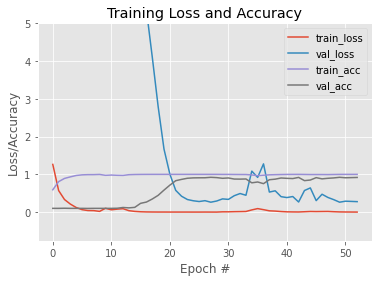

                           precision    recall  f1-score   support

              Black-grass       0.78      0.81      0.79        52
                 Charlock       0.96      0.96      0.96        78
                 Cleavers       0.98      0.91      0.95        57
         Common Chickweed       0.97      0.96      0.96       122
             Common wheat       0.91      0.95      0.93        44
                  Fat Hen       0.97      0.96      0.96        95
         Loose Silky-bent       0.89      0.92      0.90       130
                    Maize       1.00      0.91      0.95        44
        Scentless Mayweed       0.93      0.99      0.96       103
          Shepherds Purse       0.95      0.83      0.88        46
Small-flowered Cranesbill       0.95      0.97      0.96        99
               Sugar beet       0.97      0.96      0.97        77

                 accuracy                           0.94       947
                macro avg       0.94      0.93      0.93    

In [22]:
model = build_model(input_shape = network_input_shape
                    , filters = [[64,64],[128,128],[256,256],[512,512]]
                    , kernels = [[1,1],[2,2],[3,3],[3,3]]
                    , strides = [[1,1],[1,1],[1,1],[1,1]]
                    , top_model_units=[256,128]
                    , use_maxpooling=True
                    , use_batch_normalization=True
                    , use_dropout=False
                    , show_summary=False)

print("[INFO]: Entrenando la red...")
n_epochs = 100
training_batch_size = 128
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
H = model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs, callbacks=[early_stopping_callback])

if early_stopping_callback.stopped_epoch > 0:
  n_epochs = early_stopping_callback.stopped_epoch + 1
  print(f'El entrenamiento se detuvo luego de {early_stopping_callback.stopped_epoch + 1} epocas')

# Evaluación del modelo
show_model_evalution(model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

### Conclusiones generales estrategia 1

Se tuvieron dos escenarios en la primera estrategia, la primera cuando se comenzó a probar con distintos experimentos sin normalizar (sin dividir las imagenes por 255) y despues de normalizar. Los experimentos que quedaron en este PDF resumen fueron los realizados con el set de datos normalizado, los cuales arrojaron mejores resultados generales con respecto a la precisión promedio de la red en fase de predicción.

Por otro lado cuando se realizaron experimentos sin aplicar la normalización el data augmentation tuvo mejor efecto especificamente sobre la precisión para la clase **Black-grass** (400 imagenes sintéticas generadas) con hasta un 0.80.

En general, pudimos encontrar un modelo optimo con una precisión promedio de 0.94 utilizando una arquitectura con 4 bloques convolucionales (2 capas por bloque), con diferentes tamaños de filtros y data augmentation en todas las clases. Vale la pena anotar que el tener diferentes resoluciones de imagenes (algunas incluso inferiores al tamaño utilizado en este proyecto de 192x192) puede estar afectando el desempeño de la red y que la clase **Black-grass** por las características de sus imagenes tiene una baja precisión (0.78) sin importar la cantidad de las mismas.
  

## Estrategia 2 - Topología con red pre-entrenada

In [ ]:
# Reiniciamos los datos de entrenamiento y test esta vez sin normalizar las imagenes
train_x, train_y, test_x, test_y = generate_training_test_data(train_images_path
                                        , (192,192)
                                        , label_names
                                        , n_images
                                        , validation_split=0.2
                                        , norm_images=False)

# Shape de la entrada de la red
network_input_shape = (train_x.shape[1], train_x.shape[2], train_x.shape[3])

In [26]:
# Función para bloquear o desbloquear capas del model para fine-tuning
def set_model_layers_not_trainable(model, layer_name):
  for layer in model.layers: 
    if layer.name == layer_name: 
      break 
    layer.trainable = False 

### Experimento con VGG16

In [42]:
from tensorflow.keras.applications import VGG16

In [43]:
# Aplicamos el preprocesamiento requerido por la red
train_x = tf.keras.applications.vgg16.preprocess_input(train_x)
test_x = tf.keras.applications.vgg16.preprocess_input(test_x)

In [ ]:
# Cargamos solo el top model
base_model = VGG16(weights='imagenet',
                 include_top=False, # No incluir el top model, i.e. la parte densa destinada a la clasificación (fully connected layers)
                 input_shape=network_input_shape)
base_model.summary()

####**Experimento #1**

Entrenamos solo el top model con la red VGG16 bloqueada

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               4718848   
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_7 (Batc  (None, 128)              512       
 hNormalization)                                      

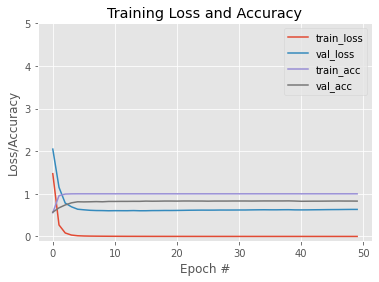

                           precision    recall  f1-score   support

              Black-grass       0.56      0.44      0.49        52
                 Charlock       0.86      0.96      0.91        78
                 Cleavers       0.92      0.77      0.84        57
         Common Chickweed       0.81      0.84      0.83       122
             Common wheat       0.76      0.70      0.73        44
                  Fat Hen       0.95      0.74      0.83        95
         Loose Silky-bent       0.75      0.86      0.80       130
                    Maize       0.93      0.86      0.89        44
        Scentless Mayweed       0.72      0.91      0.81       103
          Shepherds Purse       0.81      0.48      0.60        46
Small-flowered Cranesbill       0.87      0.90      0.89        99
               Sugar beet       0.86      0.88      0.87        77

                 accuracy                           0.81       947
                macro avg       0.82      0.78      0.79    

In [41]:
set_model_layers_not_trainable(base_model, "")# Todas las capas bloqueadas
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())

pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.BatchNormalization())

pre_trained_model.add(layers.Dense(128, activation='relu'))
pre_trained_model.add(layers.BatchNormalization())

pre_trained_model.add(layers.Dense(12, activation='softmax'))

pre_trained_model.summary()

pre_trained_model.compile(optimizer=Adam(learning_rate=0.001)
              , loss='sparse_categorical_crossentropy'
              , metrics=['accuracy'])

print("[INFO]: Entrenando la red...")
n_epochs = 50
training_batch_size = 128
H = pre_trained_model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs)

# Evaluación del modelo
show_model_evalution(pre_trained_model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

####**Experimento #2 - Fine tuning**

Teniendo en cuenta que no se logra un resultado optimo con la red pre-entrenada completamente bloqueada procedemos a experimentar desbloqueando algunas capas de la VGG16

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_10 (Flatten)        (None, 18432)             0         
                                                                 
 dense_30 (Dense)            (None, 256)               4718848   
                                                                 
 batch_normalization_20 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_21 (Bat  (None, 128)              512       
 chNormalization)                                    

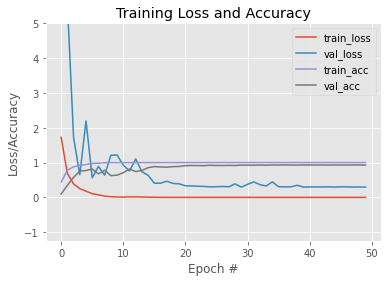

                           precision    recall  f1-score   support

              Black-grass       0.68      0.54      0.60        52
                 Charlock       0.99      0.96      0.97        78
                 Cleavers       0.96      0.95      0.96        57
         Common Chickweed       0.95      0.98      0.96       122
             Common wheat       0.91      0.95      0.93        44
                  Fat Hen       0.98      0.93      0.95        95
         Loose Silky-bent       0.80      0.91      0.85       130
                    Maize       0.95      0.93      0.94        44
        Scentless Mayweed       0.93      0.96      0.94       103
          Shepherds Purse       0.97      0.85      0.91        46
Small-flowered Cranesbill       0.98      0.97      0.97        99
               Sugar beet       0.95      0.95      0.95        77

                 accuracy                           0.92       947
                macro avg       0.92      0.91      0.91    

In [45]:
base_model = VGG16(weights='imagenet',
                 include_top=False, # No incluir el top model, i.e. la parte densa destinada a la clasificación (fully connected layers)
                 input_shape=network_input_shape)

set_model_layers_not_trainable(base_model, "block5_conv1")
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())

pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.BatchNormalization())

pre_trained_model.add(layers.Dense(128, activation='relu'))
pre_trained_model.add(layers.BatchNormalization())

pre_trained_model.add(layers.Dense(12, activation='softmax'))

pre_trained_model.summary()

pre_trained_model.compile(optimizer=Adam(learning_rate=0.001)
              , loss='sparse_categorical_crossentropy'
              , metrics=['accuracy'])

print("[INFO]: Entrenando la red...")
n_epochs = 50
training_batch_size = 128
H = pre_trained_model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs)

# Evaluación del modelo
show_model_evalution(pre_trained_model, H, n_epochs, training_batch_size, test_x, test_y, label_names)


### Experimento con ResNet152V2

In [27]:
from tensorflow.keras.applications import ResNet152V2

In [ ]:
# Reiniciamos los datos de entrenamiento y test esta vez sin normalizar las imagenes
train_x, train_y, test_x, test_y = generate_training_test_data(train_images_path
                                        , (192,192)
                                        , label_names
                                        , n_images
                                        , validation_split=0.2
                                        , norm_images=False)

In [28]:
train_x = tf.keras.applications.resnet_v2.preprocess_input(train_x)
test_x = tf.keras.applications.resnet_v2.preprocess_input(test_x)

In [ ]:
# Cargamos solo el top model
base_model = ResNet152V2(weights='imagenet',
                 include_top=False, # No incluir el top model, i.e. la parte densa destinada a la clasificación (fully connected layers)
                 input_shape=network_input_shape)
base_model.summary();

####**Experimento #1**

Entrenamos con toda la red bloqueada

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 6, 6, 2048)        58331648  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 256)               18874624  
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                      

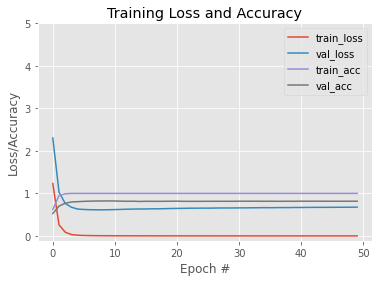

                           precision    recall  f1-score   support

              Black-grass       0.65      0.42      0.51        52
                 Charlock       0.85      0.97      0.91        78
                 Cleavers       0.87      0.79      0.83        57
         Common Chickweed       0.88      0.81      0.84       122
             Common wheat       0.82      0.70      0.76        44
                  Fat Hen       0.81      0.87      0.84        95
         Loose Silky-bent       0.72      0.88      0.80       130
                    Maize       0.97      0.89      0.93        44
        Scentless Mayweed       0.82      0.90      0.86       103
          Shepherds Purse       0.77      0.50      0.61        46
Small-flowered Cranesbill       0.92      0.90      0.91        99
               Sugar beet       0.91      0.94      0.92        77

                 accuracy                           0.83       947
                macro avg       0.83      0.80      0.81    

In [30]:
set_model_layers_not_trainable(base_model, "")# Todas las capas bloqueadas
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())

pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.BatchNormalization())

pre_trained_model.add(layers.Dense(128, activation='relu'))
pre_trained_model.add(layers.BatchNormalization())

pre_trained_model.add(layers.Dense(12, activation='softmax'))

pre_trained_model.summary()

pre_trained_model.compile(optimizer=Adam(learning_rate=0.001)
              , loss='sparse_categorical_crossentropy'
              , metrics=['accuracy'])

print("[INFO]: Entrenando la red...")
n_epochs = 50
training_batch_size = 128
H = pre_trained_model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs)

# Evaluación del modelo
show_model_evalution(pre_trained_model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

####**Experimento #2 - Fine Tuning**

Teniendo en cuenta que no se logra un resultado optimo con la red pre-entrenada completamente bloqueada procedemos a experimentar desbloqueando la última capa de la ResNet152V2

In [ ]:
base_model = ResNet152V2(weights='imagenet',
                 include_top=False, # No incluir el top model, i.e. la parte densa destinada a la clasificación (fully connected layers)
                 input_shape=network_input_shape)

set_model_layers_not_trainable(base_model, "conv5_block3_3_conv")
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())

pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.BatchNormalization())

pre_trained_model.add(layers.Dense(128, activation='relu'))
pre_trained_model.add(layers.BatchNormalization())

pre_trained_model.add(layers.Dense(12, activation='softmax'))

pre_trained_model.summary()

pre_trained_model.compile(optimizer=Adam(learning_rate=0.001)
              , loss='sparse_categorical_crossentropy'
              , metrics=['accuracy'])

print("[INFO]: Entrenando la red...")
n_epochs = 50
training_batch_size = 128
H = pre_trained_model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs)

# Evaluación del modelo
show_model_evalution(pre_trained_model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

Se mejora la precisión general de la red a 0.86

####**Experimento #3**

Desbloqueando a partir del bloque conv5_block3_1_conv


In [ ]:
base_model = ResNet152V2(weights='imagenet',
                 include_top=False, # No incluir el top model, i.e. la parte densa destinada a la clasificación (fully connected layers)
                 input_shape=network_input_shape)

set_model_layers_not_trainable(base_model, "conv5_block3_1_conv")
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())

pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.BatchNormalization())

pre_trained_model.add(layers.Dense(128, activation='relu'))
pre_trained_model.add(layers.BatchNormalization())

pre_trained_model.add(layers.Dense(12, activation='softmax'))

pre_trained_model.summary()

pre_trained_model.compile(optimizer=Adam(learning_rate=0.001)
              , loss='sparse_categorical_crossentropy'
              , metrics=['accuracy'])

print("[INFO]: Entrenando la red...")
n_epochs = 50
training_batch_size = 128
H = pre_trained_model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs)

# Evaluación del modelo
show_model_evalution(pre_trained_model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

Nuevamente se presenta una mejora en la predicción subiendo a 0.88

####**Experimento #4**

Desbloqueamos otro bloque mas

In [ ]:
base_model = ResNet152V2(weights='imagenet',
                 include_top=False, # No incluir el top model, i.e. la parte densa destinada a la clasificación (fully connected layers)
                 input_shape=network_input_shape)

set_model_layers_not_trainable(base_model, "conv5_block2_1_conv")
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())

pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.BatchNormalization())

pre_trained_model.add(layers.Dense(128, activation='relu'))
pre_trained_model.add(layers.BatchNormalization())

pre_trained_model.add(layers.Dense(12, activation='softmax'))

pre_trained_model.summary()

pre_trained_model.compile(optimizer=Adam(learning_rate=0.001)
              , loss='sparse_categorical_crossentropy'
              , metrics=['accuracy'])

print("[INFO]: Entrenando la red...")
n_epochs = 50
training_batch_size = 128
H = pre_trained_model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs)

# Evaluación del modelo
show_model_evalution(pre_trained_model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

En este experimento logramos un 0.90 de precisión general

####**Experimento #5**

Desbloqueando un bloque mas

In [ ]:
base_model = ResNet152V2(weights='imagenet',
                 include_top=False, # No incluir el top model, i.e. la parte densa destinada a la clasificación (fully connected layers)
                 input_shape=network_input_shape)

set_model_layers_not_trainable(base_model, "conv5_block1_2_conv")
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())

pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.BatchNormalization())

pre_trained_model.add(layers.Dense(128, activation='relu'))
pre_trained_model.add(layers.BatchNormalization())

pre_trained_model.add(layers.Dense(12, activation='softmax'))

pre_trained_model.summary()

pre_trained_model.compile(optimizer=Adam(learning_rate=0.001)
              , loss='sparse_categorical_crossentropy'
              , metrics=['accuracy'])

print("[INFO]: Entrenando la red...")
n_epochs = 50
training_batch_size = 128
H = pre_trained_model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs)

# Evaluación del modelo
show_model_evalution(pre_trained_model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

Se mejora levemente obteniendo un 0.92 de precisión general

####**Experimento #6 - Con Data Augmentation**

Procedemos a desbloquear un bloque mas y a entrenar con data augmentation en todas las clases

In [ ]:
train_x, train_y, test_x, test_y = generate_training_test_data(train_images_path
                                        , (192,192)
                                        , label_names
                                        , n_images
                                        , validation_split=0.2
                                        , norm_images=False)

images_to_generate=100

for class_value in range(len(label_names)):
  new_images = generate_random_images(train_x[train_y == class_value], images_to_generate, f"{train_images_path}/{label_names[class_value]}")

  # Adicionamos imagenes al dataset
  train_x=np.vstack((train_x, new_images))

  new_y=np.full(new_images.shape[0], class_value)
  train_y=np.hstack((train_y, new_y))

train_x = tf.keras.applications.resnet_v2.preprocess_input(train_x)
test_x = tf.keras.applications.resnet_v2.preprocess_input(test_x)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 6, 6, 2048)        58331648  
                                                                 
 flatten_8 (Flatten)         (None, 73728)             0         
                                                                 
 dense_24 (Dense)            (None, 256)               18874624  
                                                                 
 batch_normalization_16 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_17 (Bat  (None, 128)              512       
 chNormalization)                                    

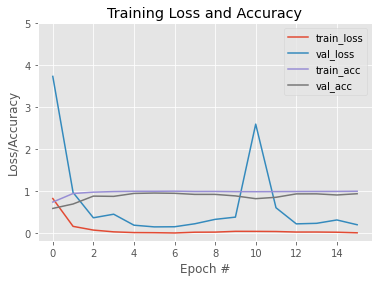

                           precision    recall  f1-score   support

              Black-grass       0.60      0.40      0.48        52
                 Charlock       1.00      1.00      1.00        78
                 Cleavers       0.98      0.89      0.94        57
         Common Chickweed       0.96      0.93      0.94       122
             Common wheat       0.97      0.82      0.89        44
                  Fat Hen       0.86      0.98      0.92        95
         Loose Silky-bent       0.72      0.87      0.79       130
                    Maize       1.00      0.91      0.95        44
        Scentless Mayweed       0.88      0.89      0.89       103
          Shepherds Purse       0.90      0.83      0.86        46
Small-flowered Cranesbill       0.93      0.99      0.96        99
               Sugar beet       1.00      0.94      0.97        77

                 accuracy                           0.89       947
                macro avg       0.90      0.87      0.88    

In [39]:
base_model = ResNet152V2(weights='imagenet',
                 include_top=False, # No incluir el top model, i.e. la parte densa destinada a la clasificación (fully connected layers)
                 input_shape=network_input_shape)

set_model_layers_not_trainable(base_model, "conv4_block36_1_conv")
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())

pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.BatchNormalization())

pre_trained_model.add(layers.Dense(128, activation='relu'))
pre_trained_model.add(layers.BatchNormalization())

pre_trained_model.add(layers.Dense(12, activation='softmax'))

pre_trained_model.summary()

pre_trained_model.compile(optimizer=Adam(learning_rate=0.001)
              , loss='sparse_categorical_crossentropy'
              , metrics=['accuracy'])

print("[INFO]: Entrenando la red...")
n_epochs = 50
training_batch_size = 128
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
H = pre_trained_model.fit(train_x, train_y, validation_split=0.2, batch_size=training_batch_size, epochs=n_epochs, callbacks=[early_stopping_callback])

if early_stopping_callback.stopped_epoch > 0:
  n_epochs = early_stopping_callback.stopped_epoch + 1
  print(f'El entrenamiento se detuvo luego de {early_stopping_callback.stopped_epoch + 1} epocas')

# Evaluación del modelo
show_model_evalution(pre_trained_model, H, n_epochs, training_batch_size, test_x, test_y, label_names)

### Conclusiones generales estrategia 2

Luego de experimentar con las redes pre-entrenadas VGG16 y ResNet152V2 sin desbloquear ninguna de sus capas no pudimos obtener resultados superiores al 0.82 en fase de predicción.

Al desbloquear el último bloque convolucional (bloque 5) de la VGG16 logramos una mejora significativa (alrededor del 0.92) con resultados muy similares a los obtenidos con la estrategia 1. Cabe anotar que realizamos pruebas desbloqueando desde los bloques 3 y 4 pero no percibimos mejora en la predicción.

Con respecto a la ResNet152V2 se realizaron diferentes experimentos desbloqueando bloques sucesivos encontrando tambien mejoras sucesivas en la precisión general de la red. Adicionalmente se realizaron experimentos con data augmentation donde se presentó un reducción en el rendimiento general de la red bajando de 0.92 a 0.90 y principalmente en las clases Black-grass y Loose Silky-bent.

En general podemos decir que logramos resultados muy consistentes si comparamos la estrategia 1 y la estrategia 2. Siendo la estrategia 1 con data augmentation la que obtuvo mejor precisión.

## Generación de documento PDF a partir del Colab Notebook (fichero ".ipynb")

In [ ]:
# Ejecutando los siguientes comandos en la última celda del Colab Notebook se convierte de ".ipynb" a PDF
# En caso de querer ocultar la salida de una celda puesto que no tenga relevancia se debe insertar 
# el comando %%capture al inicio de la misma. Véase la celda que contiene !ls test en este Notebook.

In [49]:
name_IPYNB_file = '07MIAR_Proyecto_Programacion.ipynb'
get_ipython().system(
        "apt update >> /dev/null && apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended >> /dev/null"
    )
get_ipython().system(
            "jupyter nbconvert --output-dir='$BASE_FOLDER' '$BASE_FOLDER''$name_IPYNB_file' --to pdf"
        )





[NbConvertApp] Converting notebook /content/drive/MyDrive/07MIAR_Proyecto_Programacion/07MIAR_Proyecto_Programacion.ipynb to pdf
[NbConvertApp] Support files will be in 07MIAR_Proyecto_Programacion_files/
[NbConvertApp] Making directory ./07MIAR_Proyecto_Programacion_files
[NbConvertApp] Making directory ./07MIAR_Proyecto_Programacion_files
[NbConvertApp] Making directory ./07MIAR_Proyecto_Programacion_files
[NbConvertApp] Making directory ./07MIAR_Proyecto_Programacion_files
[NbConvertApp] Making directory ./07MIAR_Proyecto_Programacion_files
[NbConvertApp] Making directory ./07MIAR_Proyecto_Programacion_files
[NbConvertApp] Making directory ./07MIAR_Proyecto_Programacion_files
[NbConvertApp] Making directory ./07MIAR_Proyecto_Programacion_files
[NbConvertApp] Making directory ./07MIAR_Proyecto_Programacion_files
[NbConvertApp] Making directory ./07MIAR_Proyecto_Programacion_files
[NbConvertApp] Writing 217597 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Runn